### Objective: Create an application to track personal expenses, generate reports, and visualize spending patterns.

In [18]:
import pandas as pd
import matplotlib.pyplot as plt


csv_file = r'C:\Users\Omkar\Desktop\Python projects\expense_data_1.csv'

In [2]:
def create_csv(file_path):
    # Sample data
    data = {
        'Date': ['2024-08-01', '2024-08-02', '2024-08-05', '2024-08-07', '2024-08-10'],
        'Category': ['Food', 'Transport', 'Entertainment', 'Food', 'Utilities'],
        'Amount': [50, 20, 75, 30, 100],
        'Description': ['Lunch at cafe', 'Bus fare', 'Movie tickets', 'Dinner at restaurant', 'Electricity bill']
    }
    df = pd.DataFrame(data)
    df.to_csv(file_path, index=False)

create_csv(csv_file)

### Define a function to add new expenses to the CSV file.



In [4]:
def add_expense(date, category, amount, description):
    # Create a DataFrame with the new expense
    new_expense = pd.DataFrame([[date, category, amount, description]], columns=['Date', 'Category', 'Amount', 'Description'])
    
    # Read existing expenses
    df = pd.read_csv(csv_file)
    
    # Concatenate the new expense DataFrame with the existing DataFrame
    df = pd.concat([df, new_expense], ignore_index=True)
    
    # Save back to CSV
    df.to_csv(csv_file, index=False)

# Example usage:
add_expense('2024-08-15', 'Transport', 15, 'Taxi ride')

### Functions to view and edit existing expenses.


In [6]:
def view_expenses():
    df = pd.read_csv(csv_file)
    return df

def edit_expense(index, date=None, category=None, amount=None, description=None):
    df = pd.read_csv(csv_file)
    
    # Update the row with the given index
    if date:
        df.at[index, 'Date'] = date
    if category:
        df.at[index, 'Category'] = category
    if amount:
        df.at[index, 'Amount'] = amount
    if description:
        df.at[index, 'Description'] = description
    
    # Save back to CSV
    df.to_csv(csv_file, index=False)

# Example usage:
print(view_expenses())
edit_expense(0, amount=55)
print(view_expenses())

         Date       Category  Amount           Description
0  2024-08-01           Food      55         Lunch at cafe
1  2024-08-02      Transport      20              Bus fare
2  2024-08-05  Entertainment      75         Movie tickets
3  2024-08-07           Food      30  Dinner at restaurant
4  2024-08-10      Utilities     100      Electricity bill
5  2024-08-15      Transport      15             Taxi ride
         Date       Category  Amount           Description
0  2024-08-01           Food      55         Lunch at cafe
1  2024-08-02      Transport      20              Bus fare
2  2024-08-05  Entertainment      75         Movie tickets
3  2024-08-07           Food      30  Dinner at restaurant
4  2024-08-10      Utilities     100      Electricity bill
5  2024-08-15      Transport      15             Taxi ride


### Functions to generate monthly and yearly reports.

In [7]:
def generate_monthly_report(year, month):
    df = pd.read_csv(csv_file)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Filter data for the given month and year
    filtered_df = df[(df['Date'].dt.year == year) & (df['Date'].dt.month == month)]
    
    # Sum expenses by category
    report = filtered_df.groupby('Category')['Amount'].sum().reset_index()
    
    return report

def generate_yearly_report(year):
    df = pd.read_csv(csv_file)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Filter data for the given year
    filtered_df = df[df['Date'].dt.year == year]
    
    # Sum expenses by month
    report = filtered_df.groupby(filtered_df['Date'].dt.month)['Amount'].sum().reset_index()
    report.columns = ['Month', 'Amount']
    
    return report

# Example usage:
print(generate_monthly_report(2024, 8))
print(generate_yearly_report(2024))


        Category  Amount
0  Entertainment      75
1           Food      85
2      Transport      35
3      Utilities     100
   Month  Amount
0      8     295


### Functions to create visualizations.

In [10]:
def plot_expense_category_pie_chart():
    df = pd.read_csv(csv_file)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Group by category and sum the expenses
    category_expenses = df.groupby('Category')['Amount'].sum()
    
    # Plot pie chart
    plt.figure(figsize=(8, 8))
    plt.pie(category_expenses, labels=category_expenses.index, autopct='%1.1f%%', startangle=140)
    plt.title('Expense Breakdown by Category')
    plt.show()

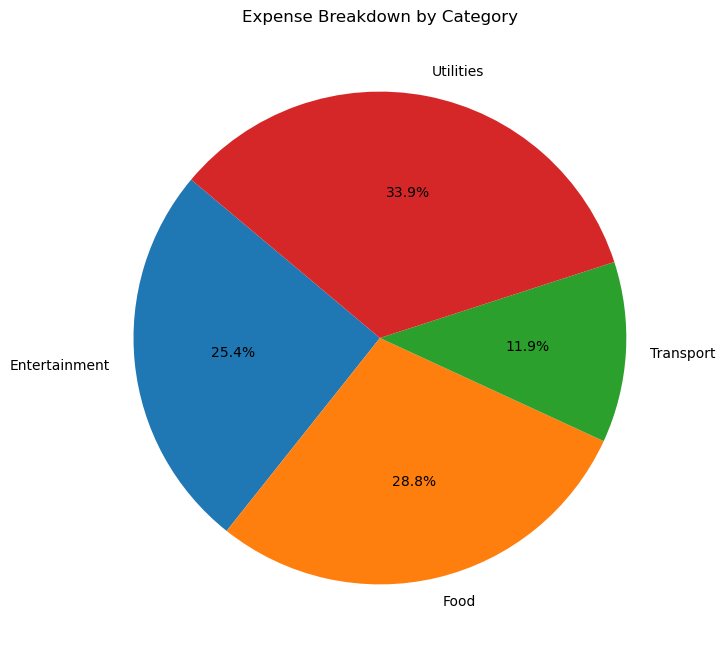

In [11]:
plot_expense_category_pie_chart()

In [12]:
def plot_monthly_expenses_bar_chart(year):
    df = pd.read_csv(csv_file)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Filter data for the given year
    filtered_df = df[df['Date'].dt.year == year]
    
    # Sum expenses by month
    monthly_expenses = filtered_df.groupby(filtered_df['Date'].dt.month)['Amount'].sum()
    
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    monthly_expenses.plot(kind='bar', color='skyblue')
    plt.xlabel('Month')
    plt.ylabel('Amount')
    plt.title(f'Monthly Expenses for Year {year}')
    plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
    plt.show()

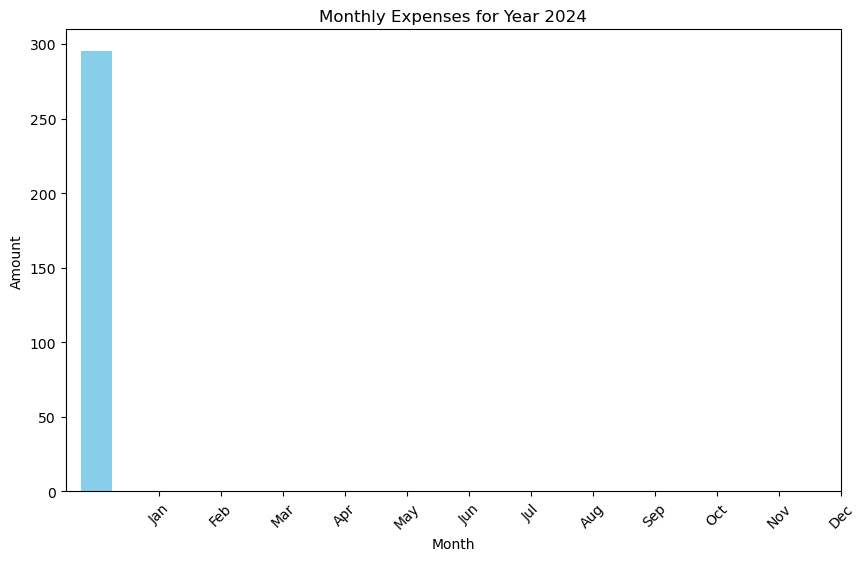

In [13]:
plot_monthly_expenses_bar_chart(2024)

### This bar chart visualizes the total expenses incurred on each day of the week.



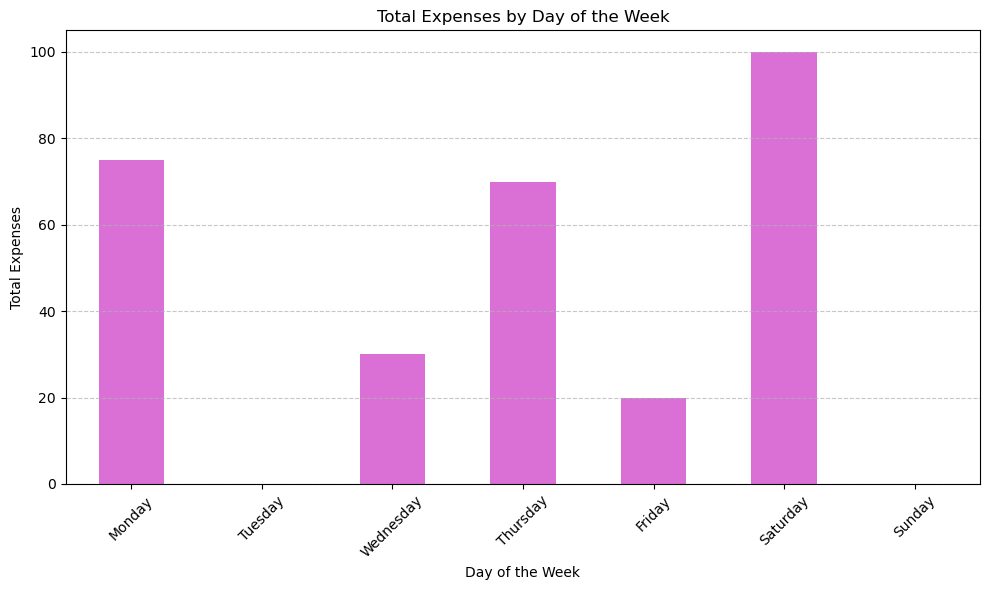

In [15]:
def plot_expenses_by_day_of_week():
    df = pd.read_csv(csv_file)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Extract day of the week and calculate total expenses for each day
    df['DayOfWeek'] = df['Date'].dt.day_name()
    day_expenses = df.groupby('DayOfWeek')['Amount'].sum()
    
    # Sort days of the week in order
    day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
    day_expenses = day_expenses.reindex(day_order)
    
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    day_expenses.plot(kind='bar', color='orchid')
    plt.xlabel('Day of the Week')
    plt.ylabel('Total Expenses')
    plt.title('Total Expenses by Day of the Week')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

plot_expenses_by_day_of_week()
#

### This bar chart tracks how expenses have changed over time, such as weekly or monthly.



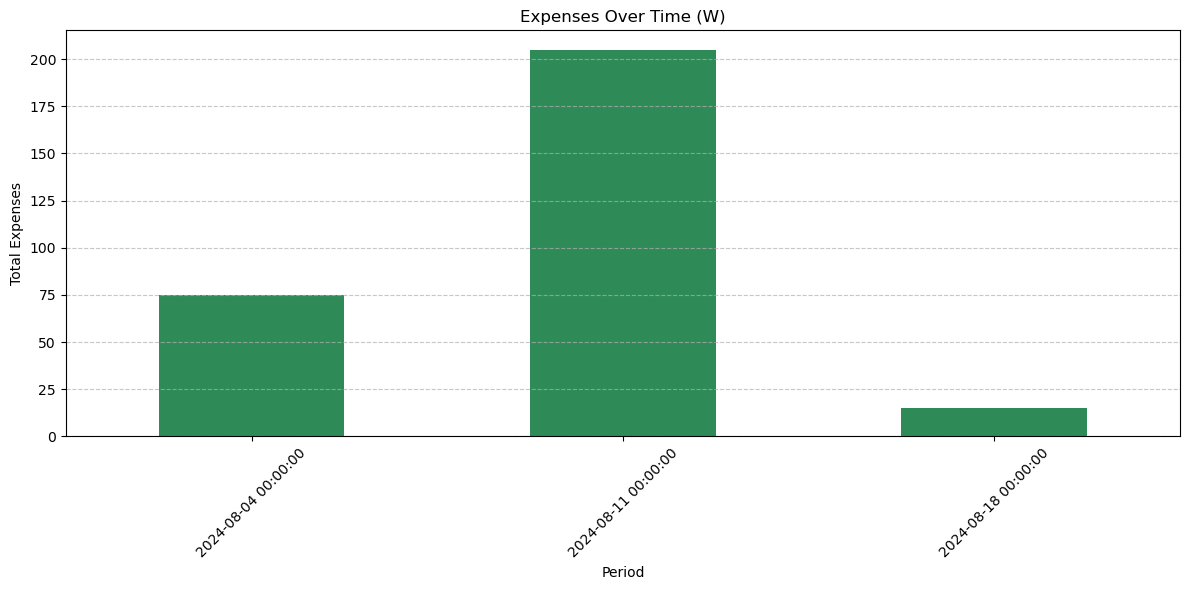

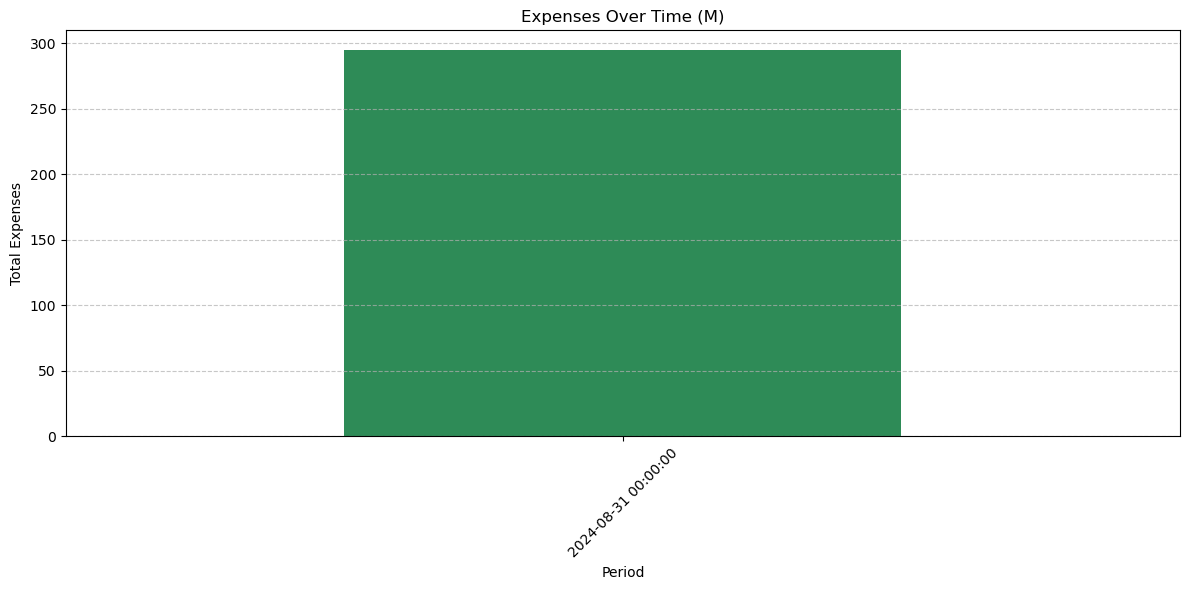

In [16]:
def plot_expenses_over_time(period='W'):
    df = pd.read_csv(csv_file)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Resample data to the desired period (e.g., weekly or monthly)
    resampled_df = df.resample(period, on='Date')['Amount'].sum()
    
    # Plot bar chart
    plt.figure(figsize=(12, 6))
    resampled_df.plot(kind='bar', color='seagreen')
    plt.xlabel('Period')
    plt.ylabel('Total Expenses')
    plt.title(f'Expenses Over Time ({period})')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_expenses_over_time('W')  # Weekly
plot_expenses_over_time('M')  # Monthly


### This bar chart displays the top N expense categories with the highest total expenses.



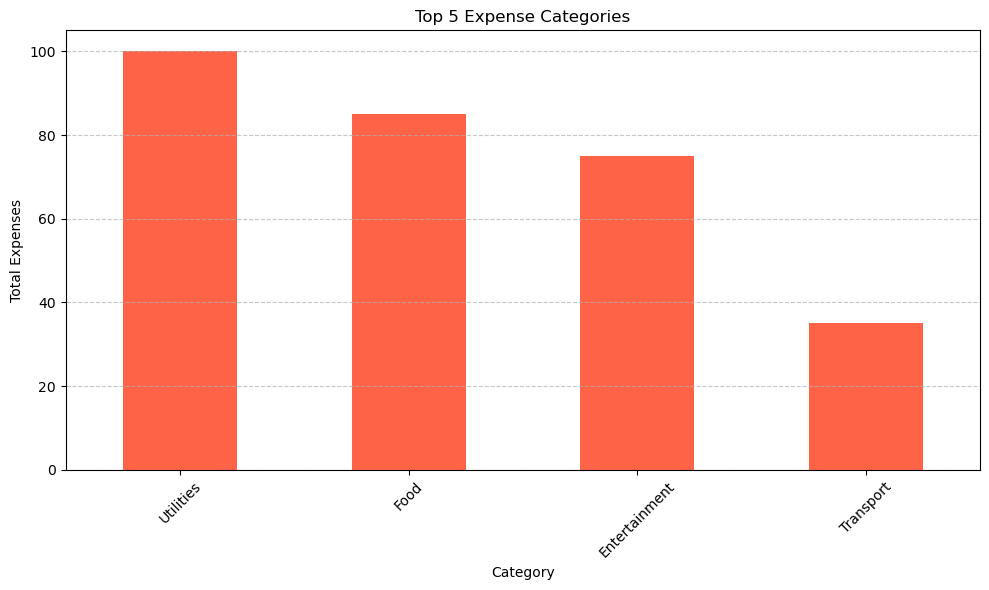

In [17]:
def plot_top_n_expense_categories(n=5):
    df = pd.read_csv(csv_file)
    df['Date'] = pd.to_datetime(df['Date'])
    
    # Calculate total expenses for each category
    category_expenses = df.groupby('Category')['Amount'].sum()
    
    # Get the top N categories
    top_categories = category_expenses.nlargest(n)
    
    # Plot bar chart
    plt.figure(figsize=(10, 6))
    top_categories.plot(kind='bar', color='tomato')
    plt.xlabel('Category')
    plt.ylabel('Total Expenses')
    plt.title(f'Top {n} Expense Categories')
    plt.xticks(rotation=45)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

# Example usage:
plot_top_n_expense_categories(5)


### Conclusion

This project will give you hands-on experience with data manipulation, file handling, and data visualization. Start with simple implementations and gradually add more features as you become more comfortable with Python and its libraries. If you need more details or have specific questions about any part of this project, feel free to ask!